In [48]:
import os #helps us in importing files from the OS
import cv2

In [49]:
features=[]
target=[]
for x in range(0,43):   #43 is the number of files we want to import
    ImagesNamesList=os.listdir("/home/udzi/myData"+"/"+str(x))    #lists all the directories (file names)
#we have taken x there which helps us in importing all the files at once 
    for y in ImagesNamesList:      #references file names
        Imgarr=cv2.imread("/home/udzi/myData"+"/"+str(x)+"/"+y)  #converts image to array
        features.append(Imgarr)
        target.append(x)
    print("In Folder",x)  

In Folder 0
In Folder 1
In Folder 2
In Folder 3
In Folder 4
In Folder 5
In Folder 6
In Folder 7
In Folder 8
In Folder 9
In Folder 10
In Folder 11
In Folder 12
In Folder 13
In Folder 14
In Folder 15
In Folder 16
In Folder 17
In Folder 18
In Folder 19
In Folder 20
In Folder 21
In Folder 22
In Folder 23
In Folder 24
In Folder 25
In Folder 26
In Folder 27
In Folder 28
In Folder 29
In Folder 30
In Folder 31
In Folder 32
In Folder 33
In Folder 34
In Folder 35
In Folder 36
In Folder 37
In Folder 38
In Folder 39
In Folder 40
In Folder 41
In Folder 42


In [3]:
import numpy as np   #converting features and targets to arrays

In [4]:
features=np.array(features)
target=np.array(target)

In [5]:
features.shape

(34799, 32, 32, 3)

In [6]:
target.shape

(34799,)

In [7]:
from sklearn.model_selection import train_test_split     #step 2: splitting


In [8]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)

In [9]:
features_train.shape

(27839, 32, 32, 3)

In [10]:
target_train.shape

(27839,)

In [11]:
features_test.shape

(6960, 32, 32, 3)

In [12]:
target_test.shape

(6960,)

In [13]:
#the technique to generate new images in the training data by modifying the orignal images in the training data is called image augmentation 

In [14]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)        #converting colored image to black and white
    image=image/255
    return image

In [15]:
#map function(concise alternative for loops(for,while) )
#syntax: map(function name,[(parameters)])


In [16]:
features_train=np.array(list(map(preprocessing,features_train)))  #applying pre processing function on all images

In [17]:
features_train.shape

(27839, 32, 32)

In [18]:
features_train=features_train.reshape(27839,32,32,1)

In [19]:
from keras.preprocessing.image import ImageDataGenerator

In [20]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [21]:
dataGen.fit(features_train)

In [22]:
batches=dataGen.flow(features_train,target_train,batch_size=20)

In [23]:
len(batches)

1392

In [24]:
#GENERATOR FUNCTIONS 
#normal function but in a normal function we use the return keyword to create a value in the global memory
#but in a generator function, we need to use the yield function in the global memory  
#return-creates a copy of the value in the global memory and it also stops the function execution at that time
#yield-creates a copy of the value in the global memory and it pauses the function execution at that time

In [25]:
images,labels=next(batches)

In [26]:
images.shape

(20, 32, 32, 1)

In [27]:
import matplotlib.pyplot as plt

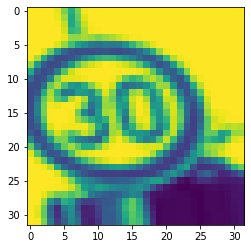

In [28]:
plt.imshow(images[0].reshape(32,32))
plt.show()

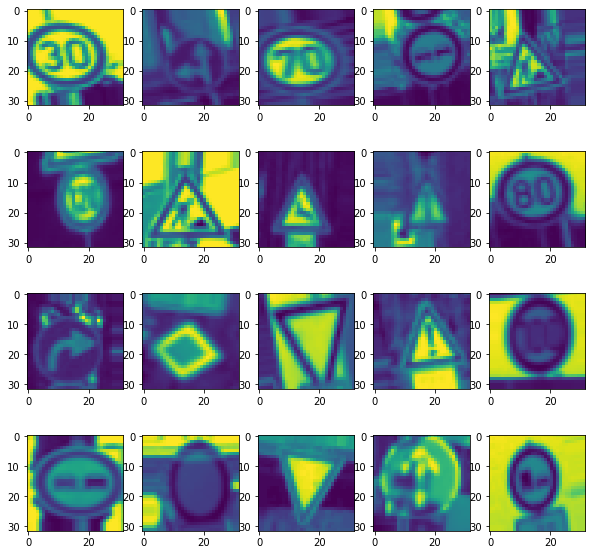

In [29]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(32,32))
plt.show()

In [30]:
from tensorflow.keras.utils import to_categorical

In [31]:
target_train=to_categorical(target_train)

In [32]:
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential

In [33]:
#ARCHITECTURE (STEP-1)
model=Sequential()
model.add(Conv2D(60,(3,3),activation="relu",input_shape=(32,32,1)))
model.add(Conv2D(60,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(Conv2D(30,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))          #helps us to prevent over-fitting
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(43,activation="softmax"))

In [34]:
from keras.optimizers import Adam

In [35]:
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [36]:
model.fit_generator(dataGen.flow(features_train,target_train,batch_size=20),epochs=25)

/home/udzi/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
1392/1392 [==============================] - 118s 76ms/step - loss: 2.9410 - accuracy: 0.2007
Epoch 2/25
1392/1392 [==============================] - 102s 74ms/step - loss: 0.8767 - accuracy: 0.7333
Epoch 3/25
1392/1392 [==============================] - 99s 71ms/step - loss: 0.5142 - accuracy: 0.8422
Epoch 4/25
1392/1392 [==============================] - 91s 65ms/step - loss: 0.3796 - accuracy: 0.8792
Epoch 5/25
1392/1392 [==============================] - 115s 83ms/step - loss: 0.3052 - accuracy: 0.9083
Epoch 6/25
1392/1392 [==============================] - 94s 68ms/step - loss: 0.2476 - accuracy: 0.9223
Epoch 7/25
1392/1392 [==============================] - 88s 63ms/step - loss: 0.2234 - accuracy: 0.9320
Epoch 8/25
1392/1392 [==============================] - 85s 61ms/step - loss: 0.2107 - accuracy: 0.9377
Epoch 9/25
1392/1392 [==============================] - 96s 69ms/step - loss: 0.1721 - accuracy: 0.9458
Epoch 10/25
1392/1392 [==============================] - 109s

In [37]:
from keras.models import model_from_json

In [41]:
#saving model architecture
model_json=model.to_json()
with open("/home/udzi/VerzeoAITraffic.json","w") as abc:
    abc.write(model_json)
    abc.close()
#we can save the weights pickle file or HDF5
#Note:data retreval is faster as HDF5
model.save_weights("/home/udzi/VerzeoAITraffic.h5")
print("Model Saved ")

Model Saved 


In [42]:
json_file= open("VerzeoAITraffic.json","r")
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)
loaded_model.load_weights("VerzeoAITraffic.h5")
print("Loaded Model Successfully ")

Loaded Model Successfully 


In [43]:
import numpy as np
import cv2

 

def getClassName(classNo):
    if   classNo == 0: return 'Speed Limit 20 km/h'
    elif classNo == 1: return 'Speed Limit 30 km/h'
    elif classNo == 2: return 'Speed Limit 50 km/h'
    elif classNo == 3: return 'Speed Limit 60 km/h'
    elif classNo == 4: return 'Speed Limit 70 km/h'
    elif classNo == 5: return 'Speed Limit 80 km/h'
    elif classNo == 6: return 'End of Speed Limit 80 km/h'
    elif classNo == 7: return 'Speed Limit 100 km/h'
    elif classNo == 8: return 'Speed Limit 120 km/h'
    elif classNo == 9: return 'No passing'
    elif classNo == 10: return 'No passing for vechiles over 3.5 metric tons'
    elif classNo == 11: return 'Right-of-way at the next intersection'
    elif classNo == 12: return 'Priority road'
    elif classNo == 13: return 'Yield'
    elif classNo == 14: return 'Stop'
    elif classNo == 15: return 'No vechiles'
    elif classNo == 16: return 'Vechiles over 3.5 metric tons prohibited'
    elif classNo == 17: return 'No entry'
    elif classNo == 18: return 'General caution'
    elif classNo == 19: return 'Dangerous curve to the left'
    elif classNo == 20: return 'Dangerous curve to the right'
    elif classNo == 21: return 'Double curve'
    elif classNo == 22: return 'Bumpy road'
    elif classNo == 23: return 'Slippery road'
    elif classNo == 24: return 'Road narrows on the right'
    elif classNo == 25: return 'Road work'
    elif classNo == 26: return 'Traffic signals'
    elif classNo == 27: return 'Pedestrians'
    elif classNo == 28: return 'Children crossing'
    elif classNo == 29: return 'Bicycles crossing'
    elif classNo == 30: return 'Beware of ice/snow'
    elif classNo == 31: return 'Wild animals crossing'
    elif classNo == 32: return 'End of all speed and passing limits'
    elif classNo == 33: return 'Turn right ahead'
    elif classNo == 34: return 'Turn left ahead'
    elif classNo == 35: return 'Ahead only'
    elif classNo == 36: return 'Go straight or right'
    elif classNo == 37: return 'Go straight or left'
    elif classNo == 38: return 'Keep right'
    elif classNo == 39: return 'Keep left'
    elif classNo == 40: return 'Roundabout mandatory'
    elif classNo == 41: return 'End of no passing'
    elif classNo == 42: return 'End of no passing by vechiles over 3.5 metric tons'

In [44]:
capt=cv2.VideoCapture(0)  #{number of seconds the webcam would capture}
capt.set(8,640)   #(option, pixel value)
capt.set(4,480)
capt.set(10,180)

True

In [ ]:
while True:
    #image=cv2.imread("path.png")
    message,image=capt.read()   
    imagearr=np.asarray(image)
    imagearr=cv2.resize(imagearr,(32,32))
    imagearr=preprocessing(imagearr)
    imagearr=imagearr.reshape(1,32,32,1)
    predictions=loaded_model.predict(imagearr)
    classIndex=loaded_model.predict_classes(imagearr)
    cv2.putText(image,"class:",(20,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.putText(image,"probability:",(20,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    probabilityValue=np.amax(predictions)
    if probabilityValue>0.75:
        cv2.putText(image,getClassName(classIndex),(120,35),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
        cv2.putText(image,str(int(probabilityValue *100))+" %",(200,75),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
    cv2.imshow("Model Prediction",image)
    returnedValue=cv2.waitKey(1)
    if returnedValue==ord("s") or returnedValue==ord("S") :
        cv2.destroyAllWindows()
        break
    

In [ ]:
#amax-gives the highest value of the array 